# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Loading the Dataset

In [9]:
data = pd.read_csv(r'C:\Users\Lapotop Land\Downloads\advertising.csv')

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploring the Dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [13]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Statistical Summary

In [16]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Checking for Missing Values

In [17]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Feature Scaling


In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Sales', axis=1))

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=['TV', 'Radio', 'Newspaper'])
scaled_data['Sales'] = data['Sales']

# Data Visualization

## Correlation Matrix

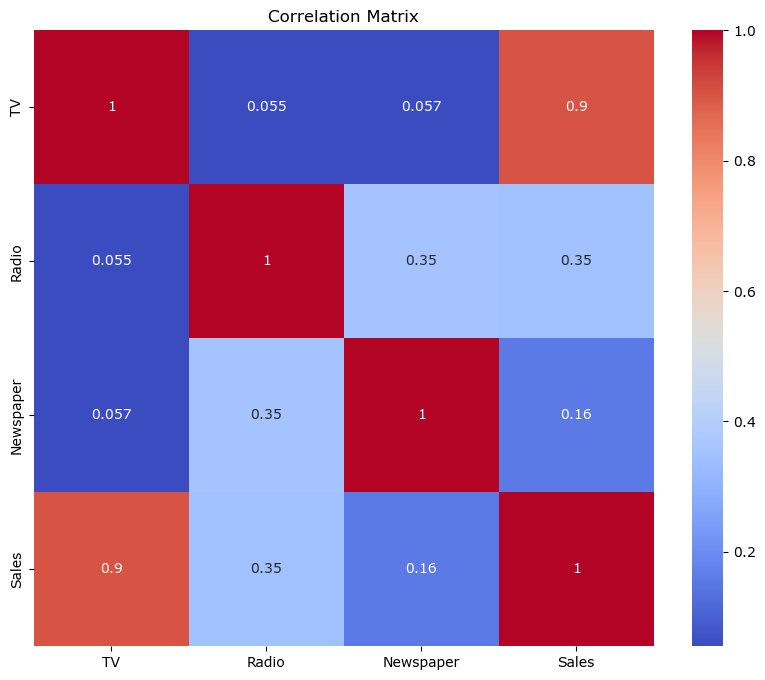

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Sales Distribution

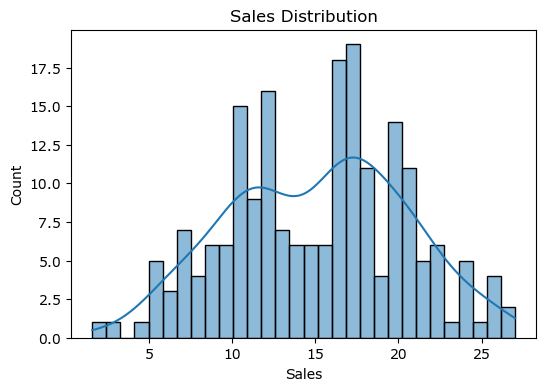

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

## Sales vs. Advertising Expenditure

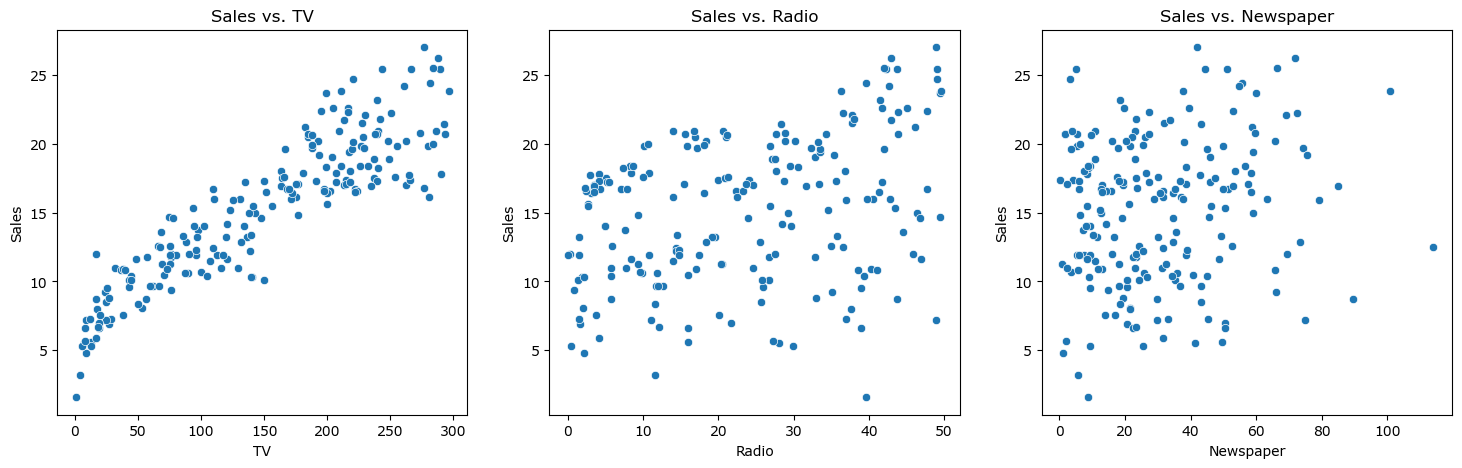

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=data['TV'], y=data['Sales'], ax=axs[0])
axs[0].set_title('Sales vs. TV')

sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axs[1])
axs[1].set_title('Sales vs. Radio')

sns.scatterplot(x=data['Newspaper'], y=data['Sales'], ax=axs[2])
axs[2].set_title('Sales vs. Newspaper')

plt.show()

# Splitting the Dataset

In [30]:
X = scaled_data.drop('Sales', axis=1)
y = scaled_data['Sales']

# Splitting the Data into Training and Test Sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development

## Linear Regression

In [32]:
# Initializing the model
lr_model = LinearRegression()

In [33]:
# Training the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Prediction
y_pred_lr = lr_model.predict(X_test)

In [35]:
# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")

Linear Regression MSE: 2.9077569102710927
Linear Regression R^2: 0.9059011844150825


## Random Forest Regression

In [36]:
# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [37]:
# Training the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Prediction
y_pred_rf = rf_model.predict(X_test)

In [39]:
# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Random Forest Regression R^2: {r2_rf}")

Random Forest Regression MSE: 1.436150725000001
Random Forest Regression R^2: 0.9535242847342004


## Decision Tree Regression

In [40]:
# Initializing the model
dt_model = DecisionTreeRegressor(random_state=42)

In [41]:
# Training the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [42]:
# Prediction
y_pred_dt = dt_model.predict(X_test)

In [43]:
# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression MSE: {mse_dt}")
print(f"Decision Tree Regression R^2: {r2_dt}")

Decision Tree Regression MSE: 3.4019999999999997
Decision Tree Regression R^2: 0.8899068317956319


# Comparing Model Performance

In [44]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree Regression'],
    'MSE': [mse_lr, mse_rf, mse_dt],
    'R^2': [r2_lr, r2_rf, r2_dt]
})

print(results)

                      Model       MSE       R^2
0         Linear Regression  2.907757  0.905901
1             Random Forest  1.436151  0.953524
2  Decision Tree Regression  3.402000  0.889907


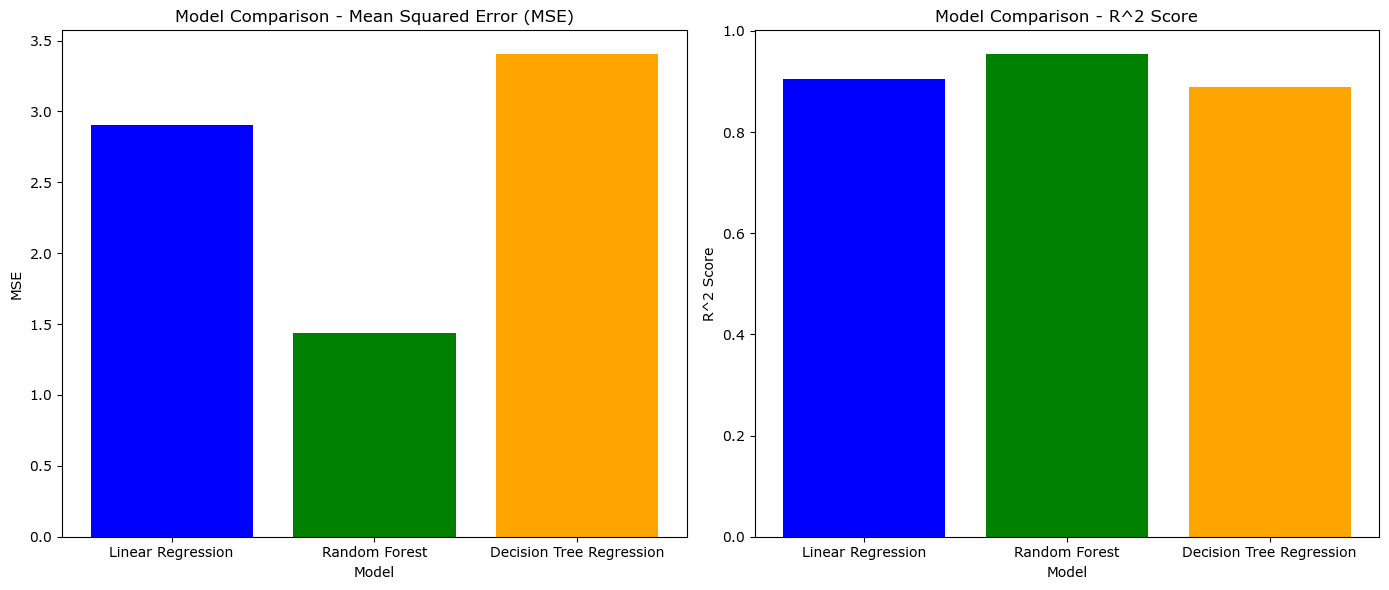

In [45]:
# Plotting the MSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['MSE'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plotting the R^2
plt.subplot(1, 2, 2)
plt.bar(results['Model'], results['R^2'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison - R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()